### Depression Status
*The dataset contains two folders, whereas one contains the data for the controls and one for the condition group. For each patient a csv file has been provided containing the actigraph data collected over time.data in the control folder of this dataset is the information of all patients in the control group (people who do not have the conditions we are trying to predict), whereas the conditions group's info (the people known to have the conditions we are trying to predict) is noted in the condition folder. The columns are: timestamp (one minute intervals), date (date of measurement), activity (activity measurement from the actigraph watch). In addition, the MADRS scores provided in the file "scores.csv".*

1. Loading Libraries and Data
2. Data Summary
3. Data Cleaning, Normalization
4. Data Exploration
5. Handling Missing Values and One Hot Coding and Prepare Data for ML
6. Regression Analysis of MADRS Score
7. Classification Analysis of Control and Condition Group
8. Conclusion



#### 1.Loading Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import fnmatch
import regex as re
import math
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
path_control = r"C:\Users*******\control"

control = pd.DataFrame()
for file in glob.glob(path_control + "/*.csv"):
    df_read = pd.read_csv(file,index_col=None, header=0)
    df_read.insert(loc=0,  column='number' , value= ' '.join(re.findall('\control_[0-9]+',file)) )  
    control = control.append(df_read,ignore_index=True)    

In [3]:
path_condition = r"C:\Users*******\control"

condition = pd.DataFrame()
for file in glob.glob(path_condition + "/*.csv"):
    df_read = pd.read_csv(file,index_col=None, header=0)
    df_read.insert(loc=0,  column='number' , value= ' '.join(re.findall('\condition_[0-9]+',file)) )  
    condition = condition.append(df_read,ignore_index=True)  

In [4]:
scores = pd.read_csv(r"C:\Users\61434\Desktop\My Codes\Python\ML\Depression Status\data\scores.csv")
scores_conditions=scores[scores.number.str.startswith("condition")]
scores_controls=scores[scores.number.str.startswith("control")]

#### 2.Data Summary

*Data contains the following columns; number (patient identifier), days (number of days of measurements), gender (1 or 2 for female or male), age (age in age groups), afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I), melanch (1: melancholia, 2: no melancholia), inpatient (1: inpatient, 2: outpatient), edu (education grouped in years), marriage (1: married or cohabiting, 2: single), work (1: working or studying, 2: unemployed/sick leave/pension), madrs1 (MADRS score when measurement started), madrs2 (MADRS when measurement stopped)."*

In [5]:
control

,number,timestamp,date,activity
0,control_1,2003-03-18 15:00:00,2003-03-18,60
1,control_1,2003-03-18 15:01:00,2003-03-18,0
2,control_1,2003-03-18 15:02:00,2003-03-18,264
3,control_1,2003-03-18 15:03:00,2003-03-18,662
4,control_1,2003-03-18 15:04:00,2003-03-18,293
...,...,...,...,...
1019985,control_9,2003-12-01 12:53:00,2003-12-01,7
1019986,control_9,2003-12-01 12:54:00,2003-12-01,7
1019987,control_9,2003-12-01 12:55:00,2003-12-01,5
1019988,control_9,2003-12-01 12:56:00,2003-12-01,5


In [6]:
condition

,number,timestamp,date,activity
0,condition_1,2003-05-07 12:00:00,2003-05-07,0
1,condition_1,2003-05-07 12:01:00,2003-05-07,143
2,condition_1,2003-05-07 12:02:00,2003-05-07,0
3,condition_1,2003-05-07 12:03:00,2003-05-07,20
4,condition_1,2003-05-07 12:04:00,2003-05-07,166
...,...,...,...,...
551711,condition_9,2004-06-10 15:03:00,2004-06-10,0
551712,condition_9,2004-06-10 15:04:00,2004-06-10,0
551713,condition_9,2004-06-10 15:05:00,2004-06-10,449
551714,condition_9,2004-06-10 15:06:00,2004-06-10,0


In [7]:
scores_controls

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
23,control_1,8,2,25-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,control_2,20,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
25,control_3,12,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
26,control_4,13,1,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
27,control_5,13,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
28,control_6,13,1,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
29,control_7,13,1,20-24,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
30,control_8,13,2,40-44,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
31,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
32,control_10,8,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN


In [8]:
scores_conditions

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


### 3. Data Cleaning, Normalization

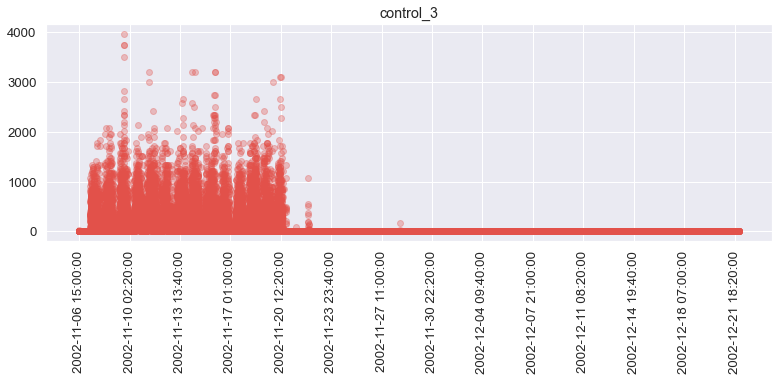

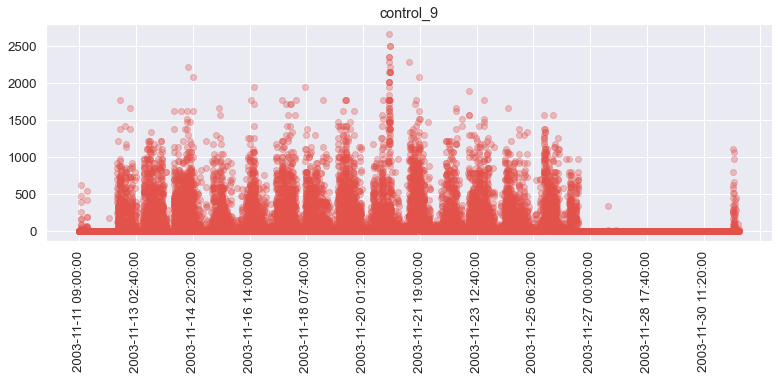

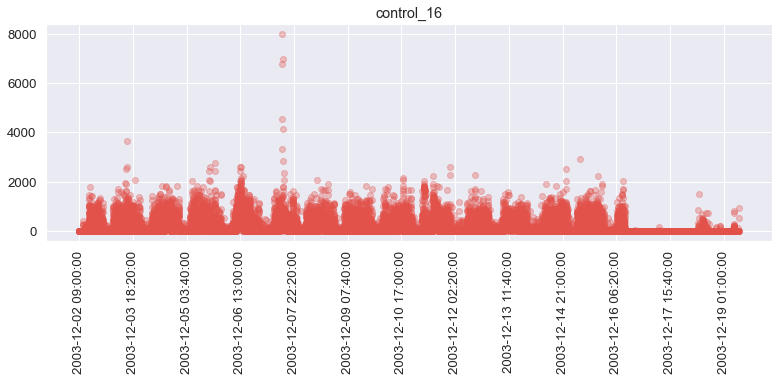

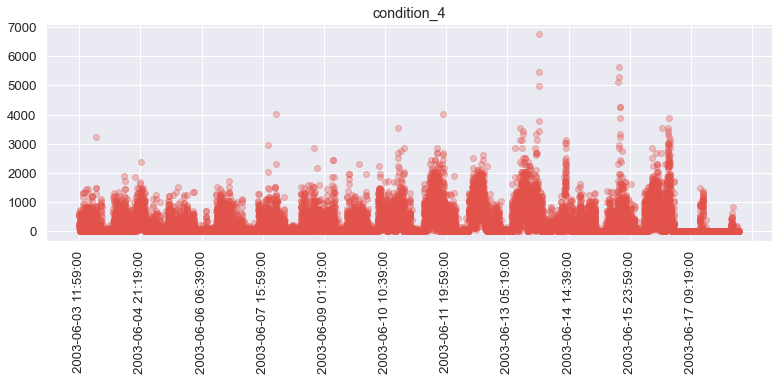

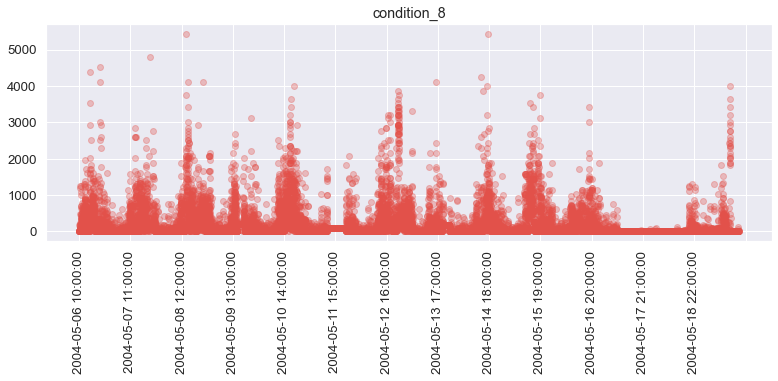

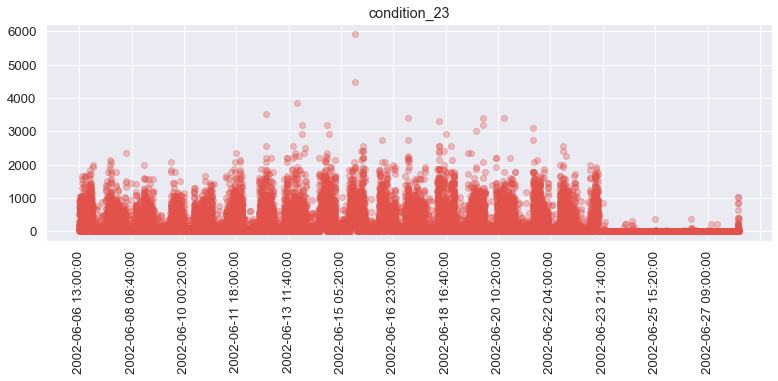

In [9]:
sns.set_theme(context='notebook', style='dark', palette="Spectral", font='sans-serif', font_scale=1.2)
for k in ["control_3","control_9","control_16"]:
    my_alpha=0.32
    fig, ax = plt.subplots(figsize=(13,4))
    ax.scatter(control[control["number"]==k].timestamp, control[control["number"]==k].activity , alpha=my_alpha)
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))
    plt.xticks(rotation=90)
    plt.title(k)
    plt.grid()
    plt.show()
  
for k in ["condition_4","condition_8","condition_23"]:
    my_alpha=0.32
    fig, ax = plt.subplots(figsize=(13,4))
    ax.scatter(condition[condition["number"]==k].timestamp, condition[condition["number"]==k].activity , alpha=my_alpha)
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))
    plt.xticks(rotation=90)
    plt.title(k)
    plt.grid()
    plt.show()

*As it can be seen from above graphs there are some time intervals people didn't put activity tracker device. So we have to eliminate these data with determining upper and lower bounds. I took lower hourly activity bound as (%4 of mean value) and upper bound as (mean value + 3 times standard deviation)*

In [10]:
x = control.timestamp.str.split(" ",expand=True)
control.insert(loc=1,  column='time' , value=x[1])
control[["hour","minute","second"]]=control.time.str.split(":",expand=True)
control=control[["timestamp","number","date","time","hour","activity"]]

In [11]:
control=control.groupby(["number","date","hour"],as_index=False)["activity"].sum()
lower_bound=control["activity"].mean()*0.04
upper_bound = 3*control["activity"].std() +control["activity"].mean()
control=control[(control["activity"]>lower_bound) & (control["activity"]<upper_bound)]
control["hourlytimestamp"]=  control['date'] + ' ' + control['hour']


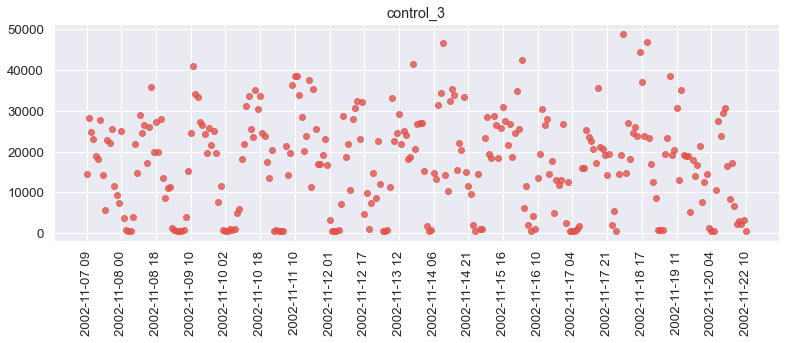

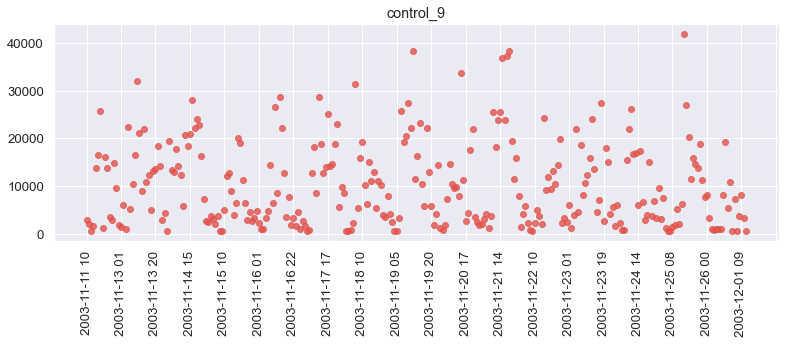

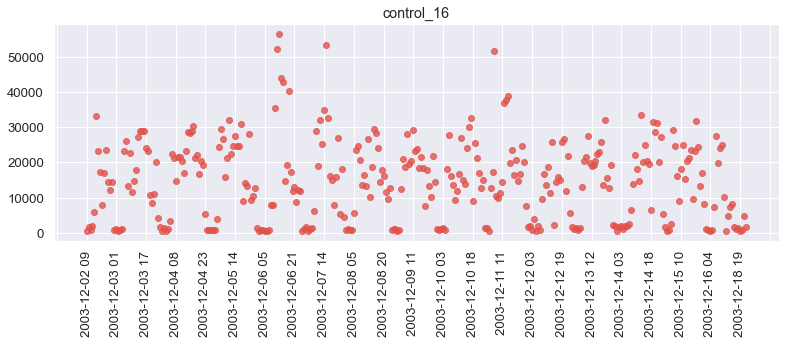

In [12]:
for k in ["control_3","control_9","control_16"]:
    my_alpha=0.78
    fig, ax = plt.subplots(figsize=(13,4))
    ax.scatter(control[control["number"]==k].hourlytimestamp, control[control["number"]==k].activity , alpha=my_alpha)
    ax.xaxis.set_major_locator(plt.MaxNLocator(25))
    plt.xticks(rotation=90)
    plt.title(k)
    plt.grid()
    plt.show()


In [13]:
y = condition.timestamp.str.split(" ",expand=True)
condition.insert(loc=1,  column='time' , value=x[1])
condition[["hour","minute","second"]]=condition.time.str.split(":",expand=True)
condition=condition[["timestamp","number","date","time","hour","activity"]]

In [14]:
condition=condition.groupby(["number","date","hour"],as_index=False)["activity"].sum()
condition_lower_bound=condition["activity"].mean()*0.04
condition_upper_bound = 3*condition["activity"].std() +condition["activity"].mean()
condition=condition[(condition["activity"]>lower_bound) & (condition["activity"]<upper_bound)]
condition["hourlytimestamp"]=  condition['date'] + ' ' + condition['hour']

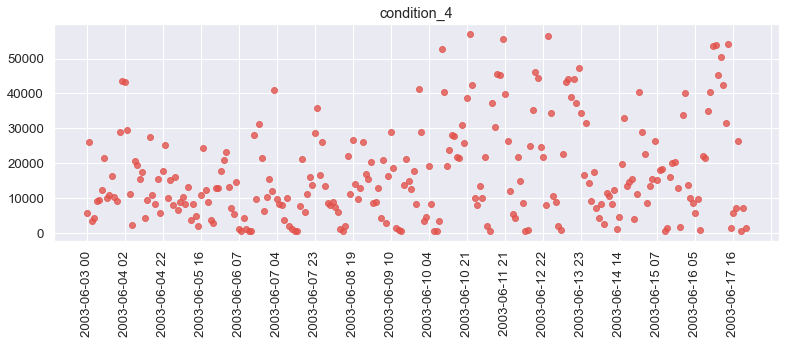

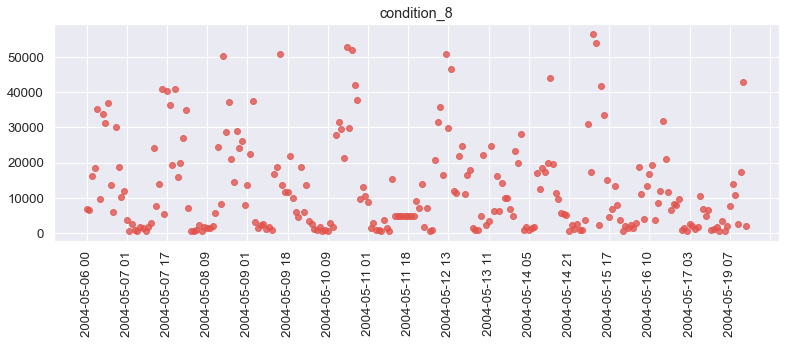

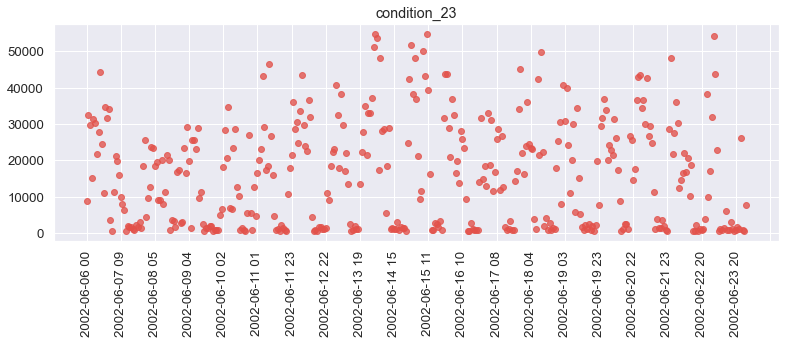

In [15]:
for k in ["condition_4","condition_8","condition_23"]:
    my_alpha=0.78
    fig, ax = plt.subplots(figsize=(13,4))
    ax.scatter(condition[condition["number"]==k].hourlytimestamp, condition[condition["number"]==k].activity , alpha=my_alpha)
    ax.xaxis.set_major_locator(plt.MaxNLocator(25))
    plt.xticks(rotation=90)
    plt.title(k)
    plt.grid()
    plt.show()

### 4. Data Exploration

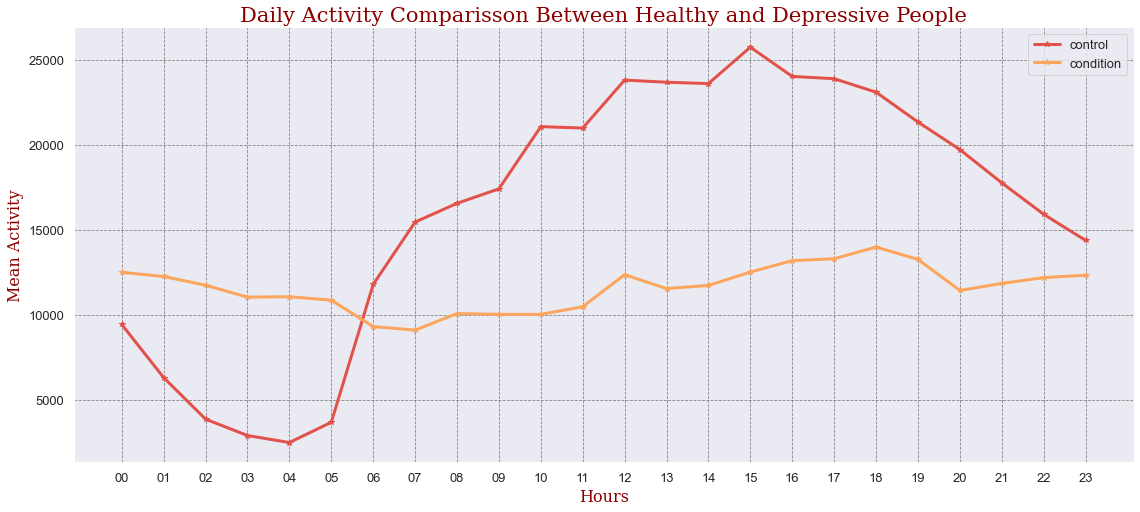

In [16]:
font = {'family':'serif','color':'darkred','size':21}
font1 = {'family':'serif','color':'darkred','size':16}
plt.figure(figsize=(19,8))
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.8)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.xlabel("Hours" , fontdict = font1)
plt.ylabel("Mean Activity" , fontdict = font1)
plt.title("Daily Activity Comparisson Between Healthy and Depressive People", fontdict = font)
plt.plot(control.groupby("hour")["activity"].mean(),marker = '*',label ='control',linewidth=3)
plt.plot(condition.groupby("hour")["activity"].mean(),marker = '*',label ="condition",linewidth=3)
plt.xticks(np.arange(0, 24, 1.0))
plt.legend(prop={'size': 13})
plt.show()

*This graph explicitly tells us healthy people show much more day time activity ,whereas depressive people stay awake night times.*

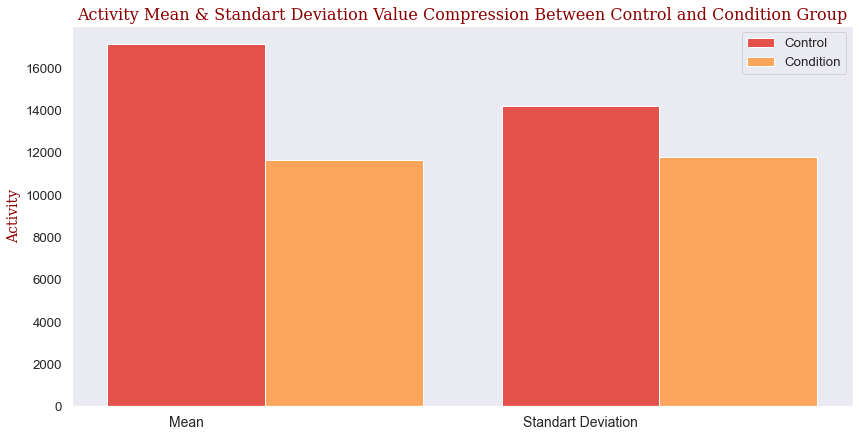

In [17]:
x = np.arange(2)
y1 = [control["activity"].mean() ,control["activity"].std()]
y2 = [condition["activity"].mean() ,condition["activity"].std()]
width = 0.4
plt.figure(figsize=(14,7))
plt.title("Activity Mean & Standart Deviation Value Compression Between Control and Condition Group", fontdict = font1)
plt.bar(x, y1, width)
plt.bar(x+width, y2, width)
plt.xticks(x, ['Mean', 'Standart Deviation'],size=14)
plt.ylabel("Activity",size=14,fontdict = font1)
plt.legend(["Control", "Condition"])
plt.show()

*We can understand from above bar graph that control group's daily activity value and fluctuation is much more than condition group's*

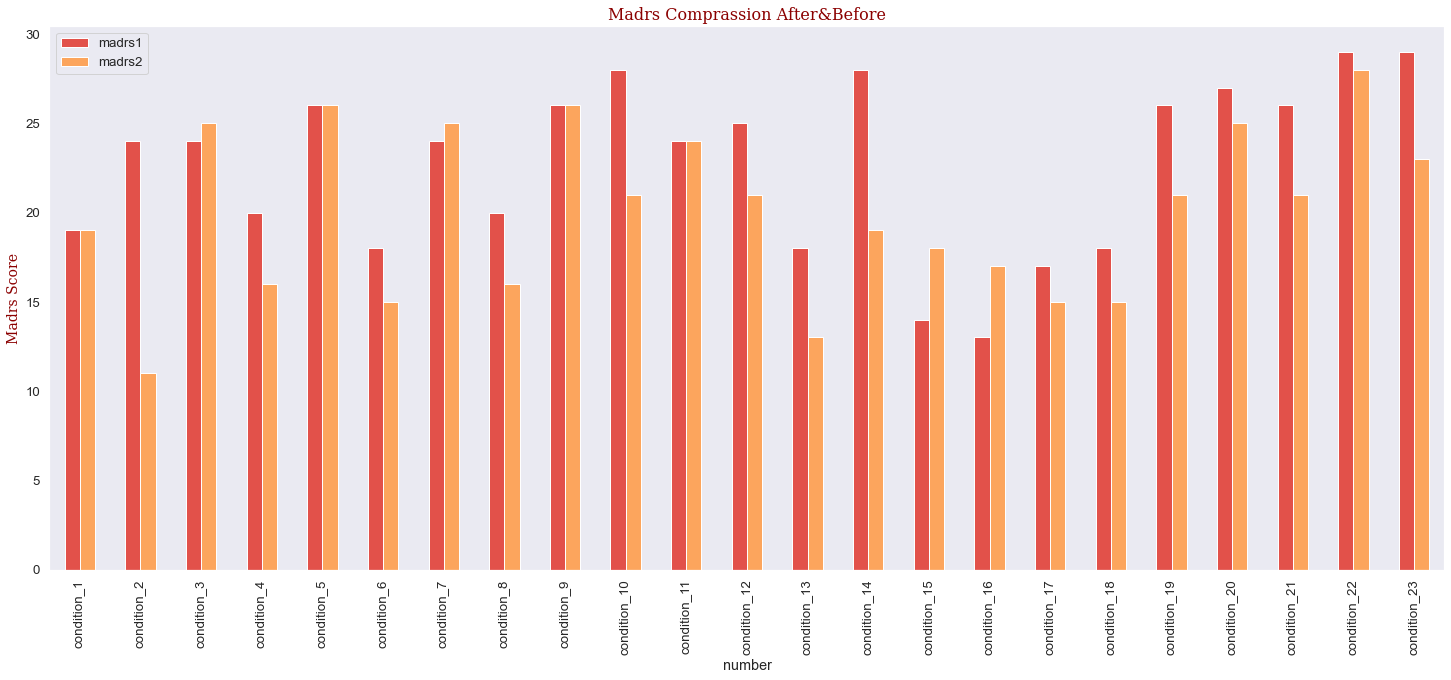

In [18]:
scores_conditions.plot(x="number",y=["madrs1","madrs2"],kind="bar",figsize=(25,10))
plt.ylabel("Madrs Score",size=14,fontdict = font1)
plt.legend(["madrs1", "madrs2"])
plt.title("Madrs Comprassion After&Before", fontdict = font1)
plt.show()

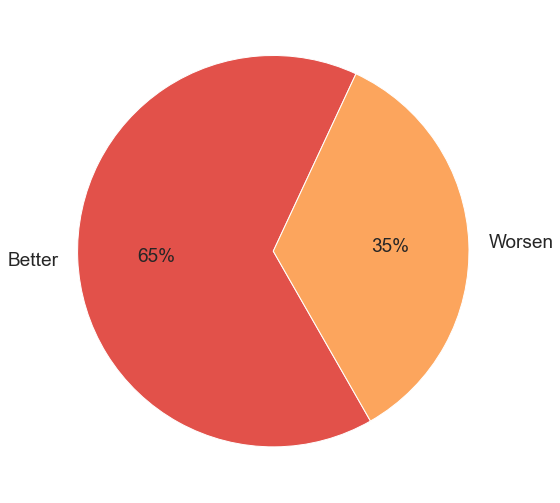

In [19]:
plt.figure(figsize = (9,9))
plt.pie([len(scores_conditions[scores_conditions.madrs1>scores_conditions.madrs2]), len(scores_conditions[scores_conditions.madrs1<=scores_conditions.madrs2])], labels = ["Better", "Worsen"],startangle=65,autopct="%1.f%%",textprops={'fontsize': 19})
plt.show() 


*%65 of patient show some improvement after being tracked.*

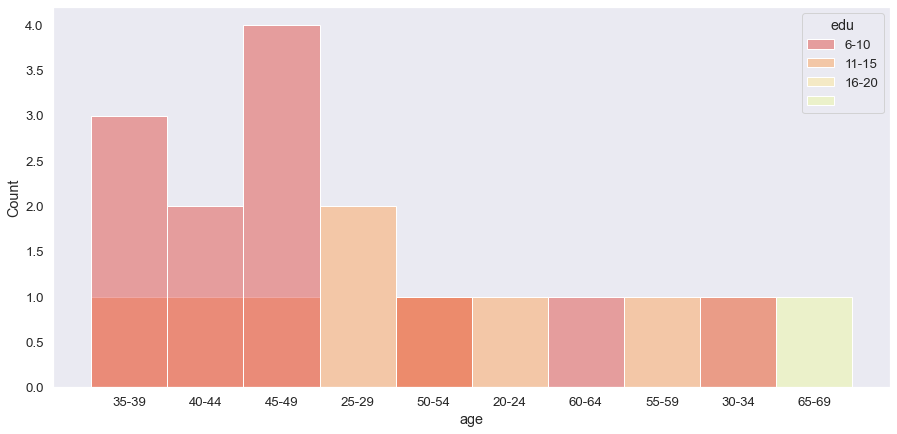

In [22]:
plt.figure(figsize = (15,7))
sns.histplot(data=scores_conditions, x="age",hue="edu",)
plt.show()

### 5. Handling Missing Values and One Hot Coding and Prepare Data for ML

In [23]:
scores_conditions=scores_conditions.applymap(lambda x: x.strip() if isinstance(x, str) else x)
scores_conditions.edu.replace({"":0},inplace=True)
scores_conditions.melanch.fillna(round(scores_conditions.melanch.mean(),0),inplace=True)

In [24]:
factorable=["gender","melanch","inpatient","marriage","work","age"]
categorical=["age","afftype","edu"]

for c in factorable:
    scores_conditions.sort_values(by=c,inplace=True)
    scores_conditions.loc[:,c] = pd.factorize(scores_conditions.loc[:,c])[0]
scores_conditions.sort_index(inplace=True)    

scores_conditions=pd.merge(scores_conditions,round(condition.groupby("number")["activity"].mean(),0),on='number')
scores_conditions.drop("days",axis=1,inplace=True)

scores_conditions=scores_conditions.join(pd.get_dummies(scores_conditions["afftype"]))
scores_conditions.drop("afftype",axis=1,inplace=True)



In [25]:
scores_conditions.rename(columns={"age":"age_level","edu":"edu_level",1.0: 'bipolar_II',2.0: 'unipolar_depressive',3.0: 'bipolar_I',"activity":"Hourly_Mean_Activity"},inplace=True)
scores_conditions.edu_level.replace({"6-10":1,"11-15":2,"16-20":3},inplace=True)

*Let's split activity values to night and day time activity.*

In [26]:
nighttimes_condition=condition[(condition["hour"]=="00") | (condition["hour"]=="01") | (condition["hour"]=="02") | (condition["hour"]=="03") | (condition["hour"]=="04") | (condition["hour"]=="05")| (condition["hour"]=="06")]

Daytimes_condition=condition[(condition["hour"]=="07") | (condition["hour"]=="08") | (condition["hour"]=="09") | (condition["hour"]=="10") | (condition["hour"]=="11") | (condition["hour"]=="12")| (condition["hour"]=="13") | (condition["hour"]=="14")| (condition["hour"]=="15")| (condition["hour"]=="16") | (condition["hour"]=="17")| (condition["hour"]=="18")| (condition["hour"]=="19")| (condition["hour"]=="20")| (condition["hour"]=="21")| (condition["hour"]=="22")| (condition["hour"]=="23")]

In [ ]:
nighttimes_condition.groupby(["number"],as_index=False)["activity"].mean()
nighttimes_condition.rename(columns={"activity":"night_time_mean_activity"},inplace=True)
Daytimes_condition.groupby(["number"],as_index=False)["activity"].mean()
Daytimes_condition.rename(columns={"activity":"day_time_mean_activity"},inplace=True)

In [28]:
scores_conditions=pd.merge(scores_conditions,round(Daytimes_condition.groupby("number")["day_time_mean_activity"].mean(),0),on='number')
scores_conditions=pd.merge(scores_conditions,round(nighttimes_condition.groupby("number")["night_time_mean_activity"].mean(),0),on='number')
scores_conditions["Day/Night_activity_ratio"]=round(scores_conditions["day_time_mean_activity"]/scores_conditions["night_time_mean_activity"],1)


In [29]:
scores_controls=pd.merge(scores_controls,round(control.groupby("number")["activity"].mean(),0),on='number')
scores_controls.drop("days",axis=1,inplace=True)
nighttimes_control=control[(control["hour"]=="00") | (control["hour"]=="01") | (control["hour"]=="02") | (control["hour"]=="03") | (control["hour"]=="04") | (control["hour"]=="05")| (control["hour"]=="06")]
Daytimes_control=control[(control["hour"]=="07") | (control["hour"]=="08") | (control["hour"]=="09") | (control["hour"]=="10") | (control["hour"]=="11") | (control["hour"]=="12")| (control["hour"]=="13") | (control["hour"]=="14")| (control["hour"]=="15")| (control["hour"]=="16") | (control["hour"]=="17")| (control["hour"]=="18")| (control["hour"]=="19")| (control["hour"]=="20")| (control["hour"]=="21")| (control["hour"]=="22")| (control["hour"]=="23")]
nighttimes_control.groupby(["number"],as_index=False)["activity"].mean()
nighttimes_control.rename(columns={"activity":"night_time_mean_activity"},inplace=True)
Daytimes_control.groupby(["number"],as_index=False)["activity"].mean()
Daytimes_control.rename(columns={"activity":"day_time_mean_activity"},inplace=True)
scores_controls=pd.merge(scores_controls,round(Daytimes_control.groupby("number")["day_time_mean_activity"].mean(),0),on='number')
scores_controls=pd.merge(scores_controls,round(nighttimes_control.groupby("number")["night_time_mean_activity"].mean(),0),on='number')
scores_controls["Day/Night_activity_ratio"]=round(scores_controls["day_time_mean_activity"]/scores_controls["night_time_mean_activity"],1)


scores_controls.drop(["afftype","melanch","inpatient","edu","marriage","work","madrs1","madrs2"],inplace=True,axis=1)
scores_controls.rename(columns={"age":"age_level","activity":"Hourly_Mean_Activity"},inplace=True)


In [30]:
factorable=["gender","age_level"]

for c in factorable:
    scores_controls.sort_values(by=c,inplace=True)
    scores_controls.loc[:,c] = pd.factorize(scores_controls.loc[:,c])[0]
scores_controls.sort_index(inplace=True)    

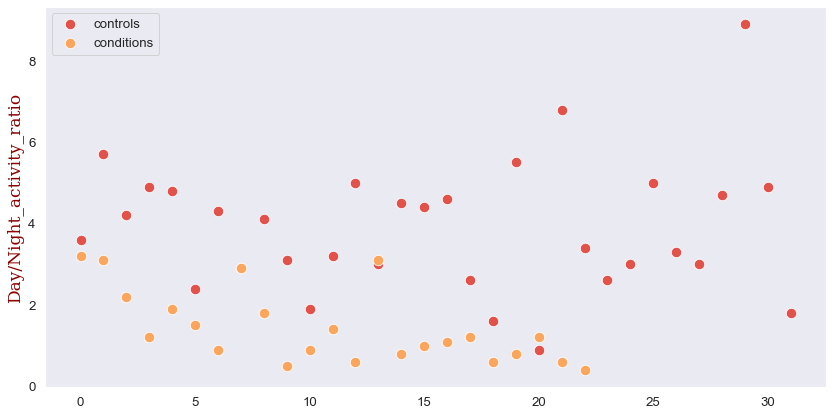

In [31]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=scores_controls,x=[*range(32)],y=scores_controls["Day/Night_activity_ratio"],label="controls",s=110)
sns.scatterplot(data=scores_conditions,x=[*range(23)],y=scores_conditions["Day/Night_activity_ratio"],label="conditions",s=110)
plt.ylabel("Day/Night_activity_ratio",size=17,fontdict = font1)
plt.show()

### 6. Regression Analysis of MADRS Score

Support Vector Machine Regression

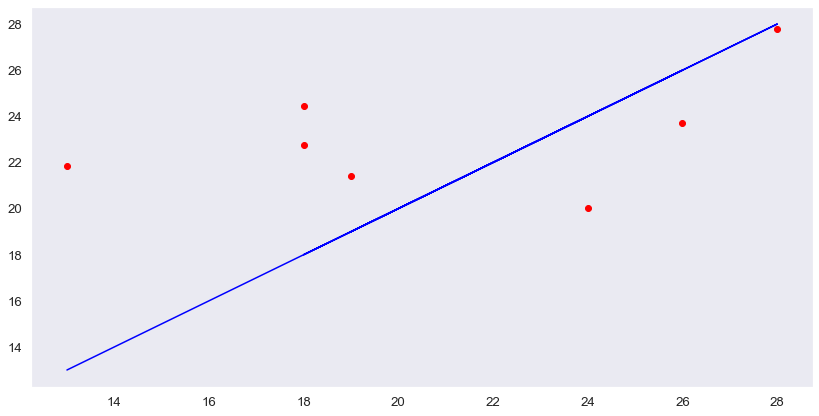

Results of Support Vector Machine Regression sklearn.metrics
MAE:       4.128
MSE:       24.119
RMSE:      4.911
R-Squared: 0.0001


In [32]:
X =scores_conditions[["gender","age_level","melanch","inpatient","edu_level","marriage","work","Hourly_Mean_Activity","bipolar_II","unipolar_depressive","bipolar_I","day_time_mean_activity","night_time_mean_activity","Day/Night_activity_ratio"]].values
y= scores_conditions[["madrs1"]].values

x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.30, random_state=42)

X_sc = StandardScaler()
y_sc = StandardScaler()
x_train = X_sc.fit_transform(x_train)
y_train = y_sc.fit_transform(y_train).ravel()

regressor = SVR(C=10, gamma="auto", kernel='sigmoid')
regressor.fit(x_train, y_train)

y_pred = regressor.predict(X_sc.transform(x_test))
y_pred= y_pred.reshape((len(y_pred), 1))
y_pred = y_sc.inverse_transform(y_pred)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y_test,y_pred)

plt.figure(figsize=(14,7))
plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.show()

print("Results of Support Vector Machine Regression sklearn.metrics")
print("MAE:      ",round(mae,3))
print("MSE:      ", round(mse,3))
print("RMSE:     ", round(rmse,3))
print("R-Squared:", round(r2,4))


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

GridSearchCV

In [35]:
p = {'C': [0.50,0.85,0.90,0.95,1.00,1.05,1.10,2,50],  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'],}

model = SVR()

gs= GridSearchCV(estimator= model ,param_grid= p ,cv=4,n_jobs=-1)

grid_search = gs.fit(x_train,y_train)

bestresult=grid_search.best_score_
bestparameters=grid_search.best_estimator_
print(f"R-Squared  {round(bestresult,2)}")
print(f"Best Parameters  {bestparameters}")   

R-Squared  0.24
Best Parameters  SVR(C=0.9, gamma='auto', kernel='sigmoid')


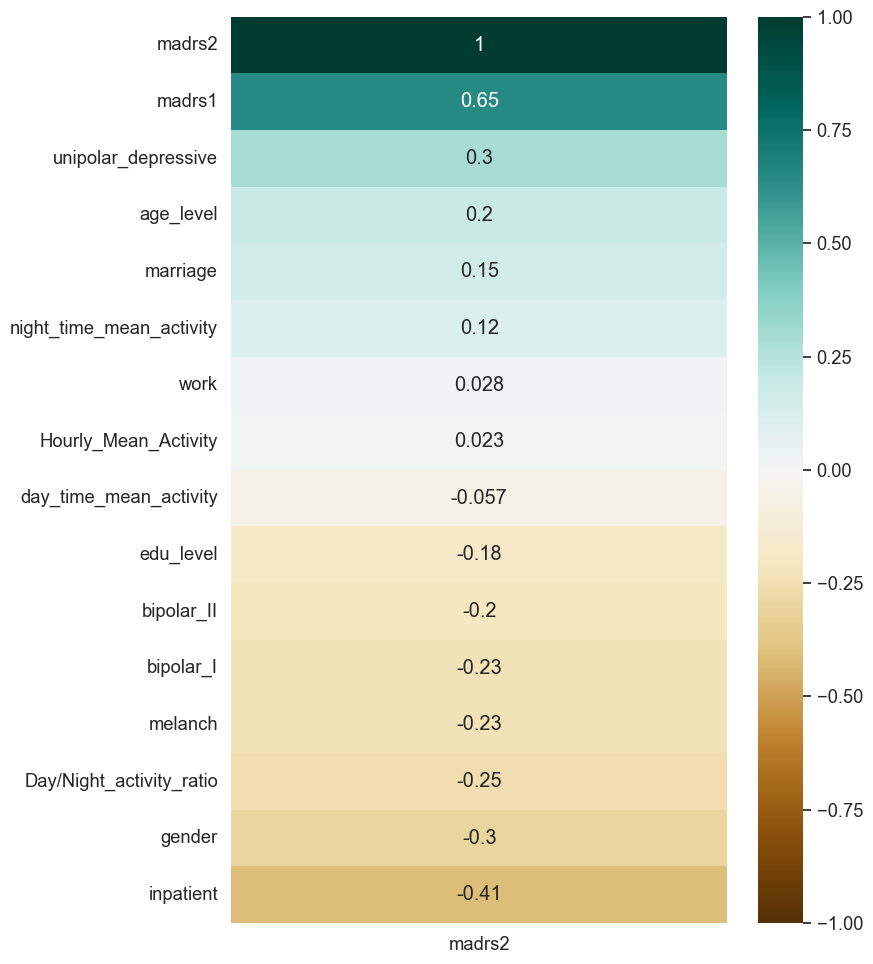

In [36]:
plt.figure(figsize=(8,12),dpi=100)
heatmap = sns.heatmap(scores_conditions.corr()[['madrs2']].sort_values(by='madrs2', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


### 7. Classification Analysis of Control and Condition Group

In [37]:
scores_conditions["status"]=1
scores_controls["status"]=0

depressionclass=pd.concat([scores_conditions,scores_controls])
depressionclass.tail()


,number,gender,age_level,melanch,inpatient,edu_level,marriage,work,madrs1,madrs2,Hourly_Mean_Activity,bipolar_II,unipolar_depressive,bipolar_I,day_time_mean_activity,night_time_mean_activity,Day/Night_activity_ratio,status
27,control_28,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17977.0,NaN,NaN,NaN,21901.0,7378.0,3.0,0
28,control_29,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16487.0,NaN,NaN,NaN,20182.0,4326.0,4.7,0
29,control_30,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13082.0,NaN,NaN,NaN,17229.0,1934.0,8.9,0
30,control_31,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20691.0,NaN,NaN,NaN,25588.0,5253.0,4.9,0
31,control_32,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11399.0,NaN,NaN,NaN,12710.0,6942.0,1.8,0


In [38]:
depressionclass.drop(columns=["melanch","inpatient","edu_level","marriage","work","madrs1","madrs2","bipolar_II","unipolar_depressive","bipolar_I"],inplace=True) 


Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
X=depressionclass.iloc[:,1:-1].values
y=depressionclass.iloc[:,-1].values

In [41]:
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=42)


In [42]:
model = LogisticRegression(solver='liblinear', C=0.1, multi_class='ovr',random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)



array([[7, 2],
       [1, 4]], dtype=int64)

In [43]:
accuracy_score(y_test, y_pred)

0.7857142857142857

K-NN

In [44]:
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
confusion_matrix(y_test, y_pred)


array([[5, 4],
       [0, 5]], dtype=int64)

In [45]:
accuracy_score(y_test, y_pred)

0.7142857142857143

Random Forest Classifier

In [46]:
rfc = RandomForestClassifier(n_estimators=2)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[7, 2],
       [4, 1]], dtype=int64)

In [47]:
accuracy_score(y_test, y_pred)

0.5714285714285714

### 8. Conclusion

In this project data exploration, normalization completed. Regression analysis performed over condition group data. We tried to predict MADRS score of depressive people. Using control group and condition group activity data, classification algorithms coded and  we tried to predict people are healthy or depressive. 

In regression analysis, we saw that SVR show better performance after grid search. Also, we learnt that with small data logistic regression classification result in better accuracy score.